# Détecteurs d'angle

## Détecteur d'angle Harris

[Harris, Christopher G. and Mike Stephens. “A Combined Corner and Edge Detector.” Alvey Vision Conference (1988)] (http://www.bmva.org/bmvc/1988/avc-88-023.pdf)

Un coin est un point dont le voisinage local se situe sur deux arêtes dominantes et distinctes. Les coins sont les caractéristiques importantes de l'image et sont généralement définis comme des points d'intérêt invariants à la translation, à la rotation et à l'éclairage.

![alt text](https://drive.google.com/uc?id=1nc3RAUAjGlzmy2yHXzfyiiHvmlwPWTX5)

Si nous prenons la zone plate de l'image (voir l'image précédente), il n'y a aucun changement de pente dans aucune direction. De même, au niveau des bords, aucun changement de pente n'est observé en direction du bord. Dans la zone d'angle, nous observons un changement significatif de pente dans toutes les directions.

###Détection d'angle

L'idée est d'examiner une petite fenêtre autour de chaque pixel p de l'image. Nous voulons reconnaître toutes ces fenêtres qui sont uniques. L'unicité peut être mesurée en déplaçant légèrement chaque fenêtre dans une direction donnée et en mesurant la quantité de changement qui se produit dans les valeurs de pixel.

Pour mesurer ce changement, nous allons prendre la différence cumulée (SSD) des valeurs de pixel avant et après le décalage et déterminer les fenêtres qui, lorsqu'elles sont appliquées aux pixels, le SSD sera grand pour les décalages dans les 8 directions.

Définissons la **fonction de changement $E(u,v)$** comme la somme de toutes les sommes des différences au carré (SSD), où $u, v$ sont les petits déplacements, $x, y$ sont le pixel coordonnées et $I$ est la valeur d'intensité du pixel.

$E(u,v)=\sum_{x,y}w(x,y)[I(x+u,y+v)-I(x,y)]^2$

où $w(x,y)=exp(-\frac{x^2+y^2}{2σ^2})$ la fonction gaussienne.


Les pixels qui ont des valeurs $E(u,v)$ supérieures à un seuil spécifié constituent les caractéristiques de l'image que nous recherchons, c'est-à-dire les coins.

Donc, nous devons maximiser la fonction $E(u,v)$ pour localiser les coins sur l'image. Cela implique qu'il faut maximiser le second terme de la fonction. En appliquant le développement de Taylor et après des opérations mathématiques, on arrive à l'équation :

$E(u,v)\approx\begin{bmatrix}u&v\end{bmatrix}\begin{pmatrix}\sum\begin{bmatrix}
I_x^2 & I_xI_y \\
I_xI_y & I_y^2
\end{bmatrix}\end{pmatrix}\begin{bmatrix}u\\v\end{bmatrix}\quad $ ή $\quad E(u,v)\approx\begin{bmatrix}u&v\end{bmatrix} Μ\begin{bmatrix}u\\v\end{bmatrix}$


En résolvant les vecteurs propres de M (matrice d'auto-corrélation), nous pouvons obtenir à la fois les plus grandes et les plus petites augmentations de SSD.
(Les valeurs propres montrent l'amplitude tandis que les vecteurs propres montrent la direction)

<img src="https://drive.google.com/uc?id=1ytW5hTP5Ofqm2EFovUbJ1APexdIXA-2e" width="60%">

Une fonction de scoring (score) R est calculée pour chaque fenêtre :

$$R=detΜ-k(traceΜ)^2$$
$$detM=λ_1λ_2$$
$$traceM=λ_1+λ_2$$

où $λ_1$ et $λ_2$ sont les valeurs propres de M et $k\in [0.04-0.06]$.

Les valeurs des valeurs propres décident si une région est un coin, une arête ou un plan, comme indiqué dans l'image suivante.

<img src="https://drive.google.com/uc?id=1wWwhq6gfwLPVYXc-ayv8UNhAsTk6t__0" width="60%">


*Étapes de l'algorithme du détecteur d'angle Harris*


1. Appliquez un filtre gaussien pour lisser le bruit sur l'image originale en niveaux de gris,
2. Appliquez le filtre Sobel pour trouver les dégradés (g(x,y)) pour chaque pixel de l'image en niveaux de gris,
3. A chaque pixel p de l'image en niveaux de gris, calculez la valeur $R$
4. Seuiller les valeurs $R$ de chaque pixel,
5. Suppression des non-maxima et recherche d'angles réels.


<img src="https://drive.google.com/uc?id=1Ylqlr1fmGtfc0u3dGw4wtM9gFE0EJZg1" width="60%">


## Détecteur d'angle Shi-Tomasi

[Jianbo Shi and Tomasi, "Good features to track," IEEE CVPR, 1994](https://https://ieeexplore.ieee.org/abstract/document/323794)

En 1994, J. Shi et C. Tomasi ont apporté une petite modification pour la détection des bords montrant de meilleurs résultats par rapport au Harris Corner Detector.

**Fonction de notation**

- Détecteur de coin de Harris : $R =λ_1λ_2-k(λ_1+λ_2)^2$

- Détecteur de coin Shi-Tomasi : $R = min (λ1, λ2)$

![](https://drive.google.com/uc?id=1XpQgdhOWPOboCSXWpeOL3P9QKFXgBaqQ)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks,corner_shi_tomasi
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


# Read in the image
image = data.checkerboard()

Implémentation de l'algorithme des détecteurs de coin de Harris et Shi-Tomasi



In [ ]:
#corner_harris
# skimage.feature.corner_harris(image, method='k', k=0.05, eps=1e-06, sigma=1)
# method{‘k’, ‘eps’}, optional  Method to compute the response image from the auto-correlation matrix.
# k float, optional Sensitivity factor to separate corners from edges, typically in range [0, 0.2]. Small values of k result in detection of sharp corners.
# eps float, optional Normalisation factor (Noble’s corner measure).
# sigma float, optional Standard deviation used for the Gaussian kernel, which is used as weighting function for the auto-correlation matrix.
# Returns responsend array Harris response image.

#corner_peaks
#skimage.feature.corner_peaks(image, min_distance=1, threshold_abs=None, threshold_rel=None, exclude_border=True, indices=True, num_peaks=inf, footprint=None, labels=None, *, num_peaks_per_label=inf)[source]
# Find corners in corner measure response image.
# This differs from skimage.feature.peak_local_max in that it suppresses multiple connected peaks with the same accumulator value.

#corner_subpix
#skimage.feature.corner_subpix(image, corners, window_size=11, alpha=0.99)
#Determine subpixel position of corners.
# A statistical test decides whether the corner is defined as the intersection of two edges or a single peak.
# Depending on the classification result, the subpixel corner location is determined based on the local covariance of the grey-values.
# If the significance level for either statistical test is not sufficient, the corner cannot be classified, and the output subpixel position is set to NaN.

# corners(N, 2) ndarray Corner coordinates (row, col).
# window_sizeint, optional Search window size for subpixel estimation.
# alphafloat, optional Significance level for corner classification.
#Returns
#positions(N, 2) ndarray Subpixel corner positions. NaN for “not classified” corners.

#Harris Corner
coords = corner_peaks(corner_harris(image), min_distance=1)
coords_subpix = corner_subpix(image, coords, window_size=13)

# Shi tomasi corner
coordshi = corner_peaks(corner_shi_tomasi(image), min_distance=1)
coords_subpixshi = corner_subpix(image, coordshi, window_size=13)

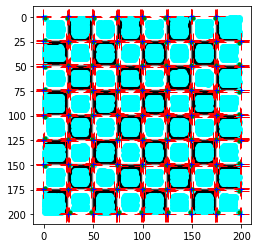

In [ ]:
fig, ax = plt.subplots()

ax.imshow(image, cmap=plt.cm.gray)

# Harris Corner
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)

# Shi tomasi corner
ax.plot(coordshi[:, 1], coordshi[:, 0], color='green', marker='o', linestyle='None', markersize=3)
ax.plot(coords_subpixshi[:, 1], coords_subpixshi[:, 0], '+b', markersize=5)

plt.show()